In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [5]:
csv_file_path = "Twitter_Data.csv"
df = pd.read_csv(csv_file_path)


In [11]:
print("First 5 Rows:\n", df.head())  

First 5 Rows:
                                           clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [13]:
print("\nDataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB

Dataset Info:
 None


In [15]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 clean_text    4
category      7
dtype: int64


In [21]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [23]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Removes extra spaces



In [27]:
df.rename(columns={'actual_column_name': 'text'}, inplace=True)


In [31]:
print(df.head())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [91]:
print("Columns in dataset:", df.columns)

# Rename column if needed
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove spaces

# Check for column name and update accordingly
if 'text' not in df.columns:
    print("Column 'text' not found! Available columns:", df.columns)
else:
    df['clean_text'] = df['text'].astype(str).apply(clean_text)

Columns in dataset: Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Sentiment', 'Cleaned_App'],
      dtype='object')
Column 'text' not found! Available columns: Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Sentiment', 'Cleaned_App'],
      dtype='object')


In [99]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        60
     Neutral       0.45      0.06      0.10       343
    Positive       0.76      0.99      0.86      1237

    accuracy                           0.76      1640
   macro avg       0.41      0.35      0.32      1640
weighted avg       0.67      0.76      0.67      1640



D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7573170731707317
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        60
     Neutral       0.50      0.07      0.12       343
    Positive       0.77      0.99      0.86      1237

    accuracy                           0.76      1640
   macro avg       0.42      0.35      0.33      1640
weighted avg       0.68      0.76      0.67      1640



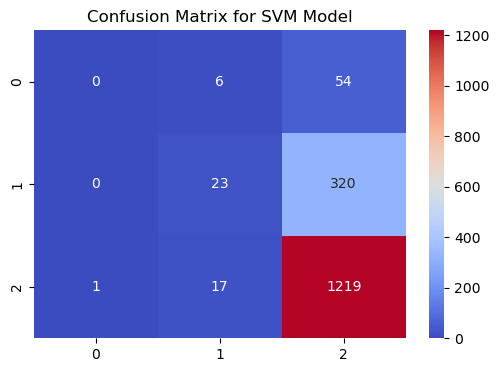


Sentiment Analysis Model Completed Successfully! 🚀


In [97]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix for SVM Model")
plt.show()

print("\nSentiment Analysis Model Completed Successfully! 🚀")

In [71]:
df = pd.read_csv("apps.csv")

In [73]:
df = df.dropna(subset=["Rating"])

In [75]:
def assign_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Rating"].apply(assign_sentiment)


In [77]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    return text

df["Cleaned_App"] = df["App"].apply(clean_text)

In [79]:
# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df["Cleaned_App"])
y = df["Sentiment"]

In [81]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [85]:
y_pred = model.predict(X_test)


In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        60
     Neutral       0.45      0.06      0.10       343
    Positive       0.76      0.99      0.86      1237

    accuracy                           0.76      1640
   macro avg       0.41      0.35      0.32      1640
weighted avg       0.67      0.76      0.67      1640



D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


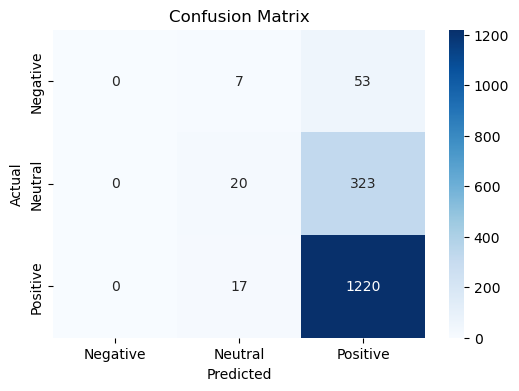

In [89]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
